Machine Learning Exercises

# Imports

In [423]:
import numpy as np
import pandas as pd
from numpy.linalg import inv, norm
from matplotlib import pyplot as plt
from math import sqrt
%matplotlib inline
np.random.seed(2)

# Utilities

In [424]:
def white_noise(number, variance):
    noise = np.random.normal(loc=0.0, scale=sqrt(variance), size=number)
    return noise

def create_phi(number, polynomial_degree=False, random=False, correct_model=False):
    """
    Note: The argument 'polynomial degree' has no effect whatsoever if
          the input for 'correct_model' is set as 'True'.
    """
    if random:
        if correct_model:
            x = np.sort(np.random.rand(number) * 2)
            phi = np.array([np.ones(number), x, x ** 2, x ** 3, x**4, x ** 5])
        elif polynomial_degree:
            x = np.sort(np.random.rand(number) * 2)
            phi = np.ones([polynomial_degree + 1, number])
            for i in range(0, polynomial_degree + 1):
                phi[i] = np.power([x], i) 
        else:
            x = np.sort(np.random.rand(number) * 2)
            phi = np.array([np.ones(number), x, x ** 2, x ** 3, x ** 5])
    elif correct_model:
        x = np.linspace(start=0.0, stop=2.0, num=number)
        phi = np.array([np.ones(number), x, x ** 2, x ** 3, x ** 4, x ** 5])
    else:
        if polynomial_degree:
            x = np.linspace(start=0.0, stop=2.0, num=number)
            phi = np.ones([polynomial_degree + 1, number])
            for i in range(0, polynomial_degree + 1):
                phi[i] = np.power([x], i)
        else:
            x = np.linspace(start=0.0, stop=2.0, num=number)
            phi = np.array([np.ones(number), x, x ** 2, x ** 3, x ** 5])
    return phi.T

def least_squares(X, y):
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

def ridge_regression(X, y, lamda):
    theta = inv(X.T @ X + lamda * I) @ X.T @ y
    return theta

def mse(real, test):
    mse = np.square(real - test).mean()
    return mse

# Problem 1

## Problem 1 - Part 1

In [425]:
N = 20
sigma_heta = 0.1
theta_real = np.array([0.2, -1.0, 0.9, 0.7, 0.0, -0.2])

In [426]:
noise = white_noise(N, sigma_heta)

In [427]:
X = create_phi(N, correct_model=True)

In [428]:
y = X @ theta_real.T

In [429]:
y += noise

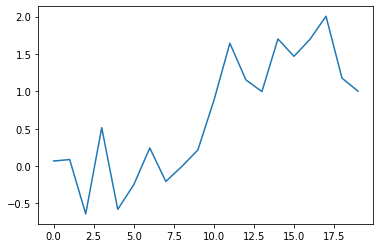

In [430]:
plt.plot(y)
plt.show()

In [431]:
theta_least_squares = least_squares(X, y)
theta_least_squares.round(3)

array([ 0.071, -0.912, -1.2  ,  5.179, -3.008,  0.445])

In [432]:
real_set = create_phi(1000, correct_model=True)
y_real = real_set @ theta_real.T
y_real += white_noise(1000, sigma_heta)

test_set = create_phi(1000, random=True, correct_model=True)
y_test = test_set @ theta_least_squares.T

In [433]:
mse_test = mse(y_real, y_test)
mse_test.round(5)

0.11723

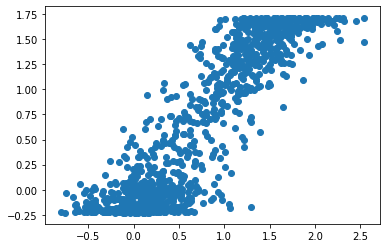

In [434]:
plt.scatter(y_real, y_test)
plt.show()

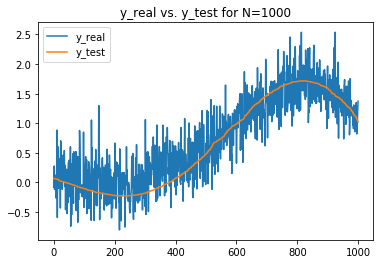

In [435]:
plt.plot(y_real, markersize=0.5, label='y_real')
plt.plot(y_test, markersize=0.5, label='y_test')
plt.title('y_real vs. y_test for N=1000')
plt.legend()
plt.show()

## Problem 1 - Part 2

In [436]:
X_2 = create_phi(N, 2)
theta_least_squares_2 = least_squares(X_2, y)

X_10 = create_phi(N, 10)
theta_least_squares_10 = least_squares(X_10, y)

In [437]:
theta_least_squares_2

array([-0.40096868,  1.04816253,  0.00842658])

In [438]:
theta_least_squares_10

array([ 7.99857593e-02,  2.82811859e+00, -6.86375136e+01,  3.80528213e+02,
       -9.17801447e+02,  1.04149045e+03, -3.90079281e+02, -2.80068497e+02,
        3.46838339e+02, -1.32593342e+02,  1.80602896e+01])

In [439]:
points_exp_2 = np.zeros((100, 20))
points_exp_10 = np.zeros((100, 20))
theta_real = np.array([0.2, -1.0, 0.9, 0.7, 0.0, -0.2])
X = create_phi(20, correct_model=True)
y_real_N = X @ theta_real.T

for i in range(0, 100):
    np.random.seed(i ** 2)
    noise = white_noise(N, sigma_heta)
    y_2 = X_2 @ theta_least_squares_2.T
    y_2 += noise
    y_10 = X_10 @ theta_least_squares_10.T
    y_10 += noise
    points_exp_2[i] = y_2
    points_exp_10[i] = y_10

In [440]:
means_2 = np.mean(points_exp_2, axis=0)
variance_2 = np.var(points_exp_2, axis=0)
means_10 = np.mean(points_exp_10, axis=0)
variance_10 = np.var(points_exp_10, axis=0)

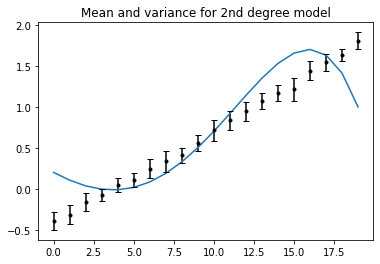

In [441]:
plt.plot(y_real_N, markersize=0.5)
plt.errorbar(range(0, 20), means_2, yerr=variance_2, fmt='.k', capsize=3)
plt.title('Mean and variance for 2nd degree model')
plt.show()

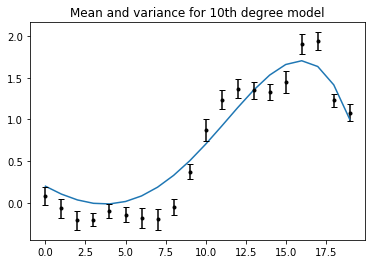

In [442]:
plt.plot(y_real_N, markersize=0.5)
plt.errorbar(range(0, 20), means_10, yerr=variance_10, fmt='.k', capsize=3)
plt.title('Mean and variance for 10th degree model')
plt.show()

## Problem 1 - Part 3

In [443]:
I = np.identity(6)
lamda_tests = np.array([0, 0.01, 0.05, 0.1, 0.25, 0.5, 1, 2, 3, 5])
lamda_mse = np.zeros(10)

In [444]:
for lamda in lamda_tests:
    theta_ridge = ridge_regression(X, y, lamda)
    y_ridge = test_set @ theta_ridge.T
    mse_ridge = mse(y_real, y_ridge)
    lamda_mse[np.where(lamda_tests == lamda)] = mse_ridge

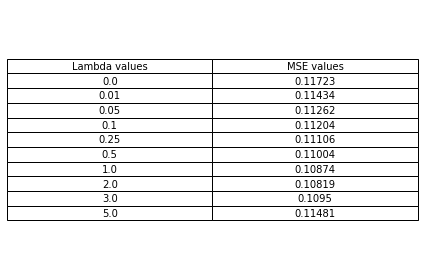

In [445]:
df = pd.DataFrame(np.column_stack((lamda_tests, lamda_mse.round(5))), 
                  columns=['Lambda values', 'MSE values'])

fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')
fig.tight_layout()
plt.show()

In [446]:
lamda_mse

array([0.11722721, 0.11434378, 0.11262155, 0.11203805, 0.11105988,
       0.11004043, 0.10874482, 0.10818807, 0.10950176, 0.11480964])

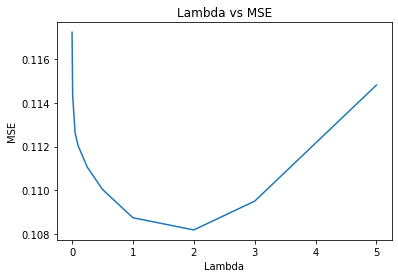

In [447]:
plt.plot(lamda_tests, lamda_mse)
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.title('Lambda vs MSE')
plt.show()

## Problem 1 - Part 4

In [448]:
def bayesian_inference(sigma_theta, sigma_heta, theta_prior, number):
    
    # Create matrices X and PHI
    X = create_phi(number, random=True)
    PHI = create_phi(number)
    
    # Set constants
    I = np.identity(5)
    noise = white_noise(number, sigma_heta)
    theta_real_2 = np.array([0.2, -1.0, 0.9, 0.7, -0.2])
    y_real_N = PHI @ theta_real_2.T
    y = y_real_N + noise
    
    # Perform Bayesian inference
    sigma_theta_posterior = inv((1 / sigma_theta) * I + (1 / sigma_heta) * PHI.T @ PHI)
    mu_theta_posterior = (theta_prior + (1 / sigma_heta) * sigma_theta_posterior @ PHI.T @ 
                          (y - PHI @ theta_prior))
    mu_y_predicted = X @ mu_theta_posterior.T
    sigma_y_predicted = np.diagonal(sigma_heta + sigma_heta * sigma_theta * X @
                                    inv(sigma_heta * I + sigma_theta * (PHI.T @ PHI)) @ X.T)
    
    # Visualize plot
    plt.plot(y_real_N, markersize=0.5)
    if number <= 100:
        plt.errorbar(range(0, number), mu_y_predicted, yerr=sigma_y_predicted, fmt='.k', capsize=3)
    else:
        plt.errorbar(range(0, number), mu_y_predicted, yerr=sigma_y_predicted, fmt=',k', capsize=0.1)
    plt.title('Bayesian Inference for N={}, sigma_theta = {}, sigma_heta = {}'.
             format(number, sigma_theta, sigma_heta))
    plt.show()

In [449]:
theta_prior = np.array([0.2, -1.0, 0.9, 0.7, -0.2])

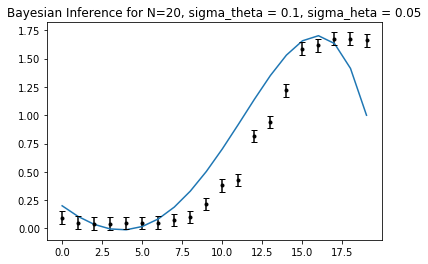

In [450]:
bayesian_inference(0.1, 0.05, theta_prior, 20)

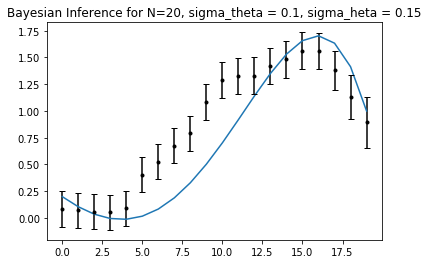

In [451]:
bayesian_inference(0.1, 0.15, theta_prior, 20)

## Problem 1 - Part 5

In [452]:
theta_prior_2 = np.array([-10.54, 0.465, 0.0087, -0.0093, -0.004])

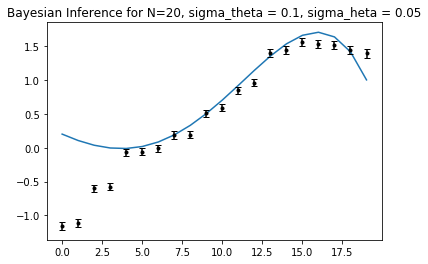

In [453]:
bayesian_inference(0.1, 0.05, theta_prior_2, 20)

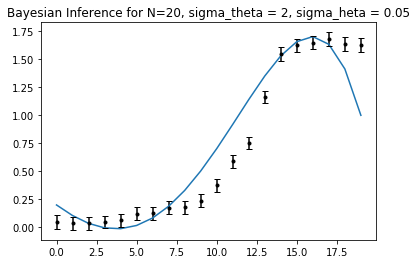

In [454]:
bayesian_inference(2, 0.05, theta_prior_2, 20)

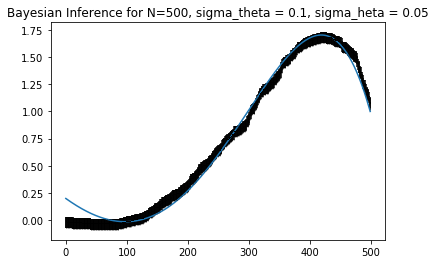

In [455]:
bayesian_inference(0.1, 0.05, theta_prior_2, 500)

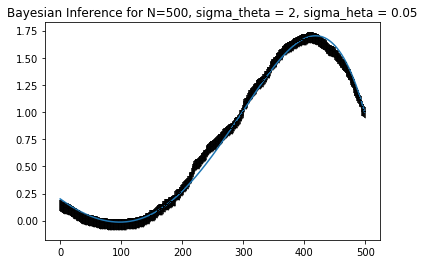

In [456]:
bayesian_inference(2, 0.05, theta_prior_2, 500)

## Problem 1 - Part 6

In [571]:
np.random.seed(50)
N = 500
sigma_heta = 0.05

PHI = create_phi(N)
theta_real_2 = np.array([0.2, -1.0, 0.9, 0.7, -0.2])
K = len(theta_real)
I = np.eye(5)
y_real_N = PHI @ theta_real_2.T
noise = white_noise(N, sigma_heta)
y = y_real_N + noise
a = 1
b = 1

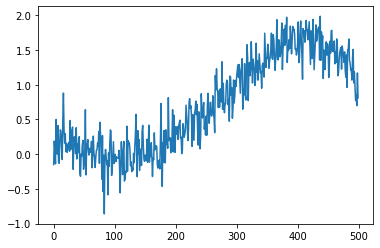

In [572]:
plt.plot(y)

In [573]:
# EM Algorithm
sigma_heta_plot = np.array([1])
a_old = np.inf
b_old = np.inf
e = 10 ** (-5)
max_i = 5000
i = 1
while ((abs(b - b_old) > e) or (abs(a - a_old) > e)) and (i < max_i):
    a_old = a
    b_old = b
    # E-step
    Sigma_theta = inv(a * I + b * PHI.T @ PHI)
    mu_theta = b * Sigma_theta @ PHI.T @ y
    A = norm(mu_theta) ** 2 + np.trace(Sigma_theta)
    B = norm(y - PHI @ mu_theta) ** 2 + np.trace(PHI @ Sigma_theta @ PHI.T)
    # M-step
    a = K / A
    b = N / B
    sigma_heta_plot = np.append(sigma_heta_plot, [1 / b])
    i += 1

In [574]:
sigma_heta = 1 / b
sigma_theta = 1 / a
print('sigma_heta = {} and sigma_theta = {}'.format(sigma_heta.round(5), sigma_theta.round(5)))

sigma_heta = 0.04782 and sigma_theta = 0.49181


In [575]:
X = create_phi(20, random=True)

In [576]:
mu_y_predicted = X @ mu_theta.T
sigma_y_predicted = np.diagonal(sigma_heta + sigma_heta * sigma_theta * X @
                                inv(sigma_heta * I + sigma_theta * (PHI.T @ PHI)) @ X.T)

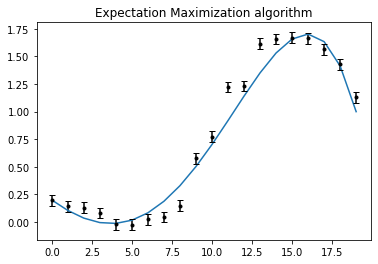

In [577]:
N_20 = 20
PHI_20 = create_phi(N_20)
y_real_20 = PHI_20 @ theta_real_2.T

plt.plot(y_real_20, markersize=0.5)
plt.errorbar(range(0, 20), mu_y_predicted, yerr=sigma_y_predicted, fmt='.k', capsize=3)
plt.title('Expectation Maximization algorithm')
plt.show()

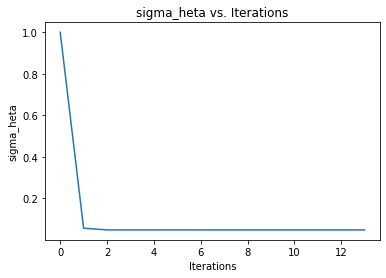

In [578]:
plt.plot(sigma_heta_plot)
plt.xlabel('Iterations')
plt.ylabel('sigma_heta')
plt.title('sigma_heta vs. Iterations')
plt.show()